# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

### 1) Browse and scrape the webpage

In [2]:
browser = Browser('chrome')

In [3]:
# Visit the website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

In [4]:
# Create a Beautiful Soup Object
html = browser.html
mars_soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = mars_soup.find('table', class_='table')
rows = table.find_all('tr')

### 2) Place scraped data into a DataFrame

In [6]:
# Create an empty list
rows_list = []
# Loop through the scraped data to create a list of rows
for row in rows:
    temp_dict = {}
    data_clmn = row.find_all('td')
    
    if len(data_clmn) != 0:
        data_id = data_clmn[0].text.strip()
        terra_date = data_clmn[1].text.strip()
        sol = data_clmn[2].text.strip()
        ls = data_clmn[3].text.strip()
        month = data_clmn[4].text.strip()
        min_temp = data_clmn[5].text.strip()
        baromtr = data_clmn[6].text.strip()
        rows_list.append({
            'id': data_id,
            'terrestrial date': terra_date,
            'sol': sol,
            'ls': ls,
            'month': month,
            'min_temp': min_temp,
            'pressure': baromtr
        })
        

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
temp_DF = pd.DataFrame(rows_list)

In [8]:
# Confirm DataFrame was created successfully
temp_DF

,id,terrestrial date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [9]:
# Examine data type of each column
temp_DF.dtypes

id                  object
terrestrial date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
temp_DF[['id','sol','ls','month']] = temp_DF[['id','sol','ls','month']].astype('int')
temp_DF['terrestrial date'] = pd.to_datetime(temp_DF['terrestrial date'])
temp_DF[['min_temp', 'pressure']] = temp_DF[['min_temp', 'pressure']].astype('float64')

In [11]:
# Confirm type changes were successful by examining data types again
temp_DF.dtypes

id                           int64
terrestrial date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### 3) Analyze the Mars weather data

In [12]:
# 1. How many months are there on Mars?
martian_months = len(temp_DF['month'].unique())
print(f"There are {martian_months} Martian months in a Martian year.")

There are 12 Martian months in a Martian year.


In [13]:
# 2. How many Martian days' worth of data are there?
data_sols = temp_DF['sol'].count()
print(f"The dataset spans {data_sols} Martian solar days or sols.")

The dataset spans 1867 Martian solar days or sols.


In [14]:
# 3. What is the average low temperature by month?
# First, we find the average monthly low temperatures...
monthly_avg_low = temp_DF.groupby('month')['min_temp'].mean()
monthly_avg_low

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

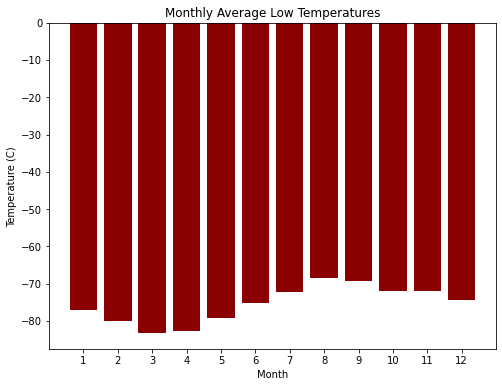

In [15]:
# Then, we plot the average temperatures...
plt.figure(figsize=(8,6))
plt.bar(monthly_avg_low.index, monthly_avg_low, color='darkred')
plt.title('Monthly Average Low Temperatures')
plt.xlabel('Month')
plt.xticks(ticks = range(1,13,1))
plt.ylabel('Temperature (C)')
plt.savefig("../Visuals/Mars_Monthly_Avg_Lows.jpg")
plt.show()

In [16]:
print(f"The coldest month on Mars is month: {monthly_avg_low.idxmin()}, with a temperature of {monthly_avg_low.min()} degrees.")
print(f"The warmest month on Mars is month: {monthly_avg_low.idxmax()}, with a temperature of {monthly_avg_low.max()} degrees.")

The coldest month on Mars is month: 3, with a temperature of -83.30729166666667 degrees.
The warmest month on Mars is month: 8, with a temperature of -68.38297872340425 degrees.



On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. However, the recorded temperatures range from -68.38 to -83.31 degrees Celsius, so it's still extremely cold compared to the comforts of planet Earth.

In [17]:
# 4. What's the average pressure by Martian month?
monthly_avg_baro = temp_DF.groupby('month')['pressure'].mean()
monthly_avg_baro

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

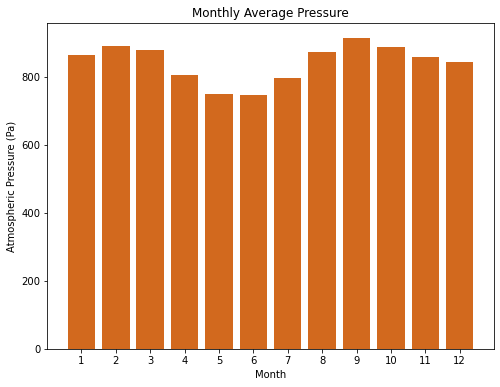

In [18]:
# Plot the average pressure by month
plt.figure(figsize=(8,6))
plt.bar(monthly_avg_baro.index, monthly_avg_baro, color='chocolate')
plt.title('Monthly Average Pressure')
plt.xlabel('Month')
plt.xticks(ticks = range(1,13,1))
plt.ylabel('Atmospheric Pressure (Pa)')
plt.savefig("../Visuals/Mars_Monthly_Atmosphere.jpg")
plt.show()

Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth. A quick lookup of Wikipedia reveals that Mars has a mean surface pressure of about 600 pascals, which is much lower than the Earth's 101,000 Pa.

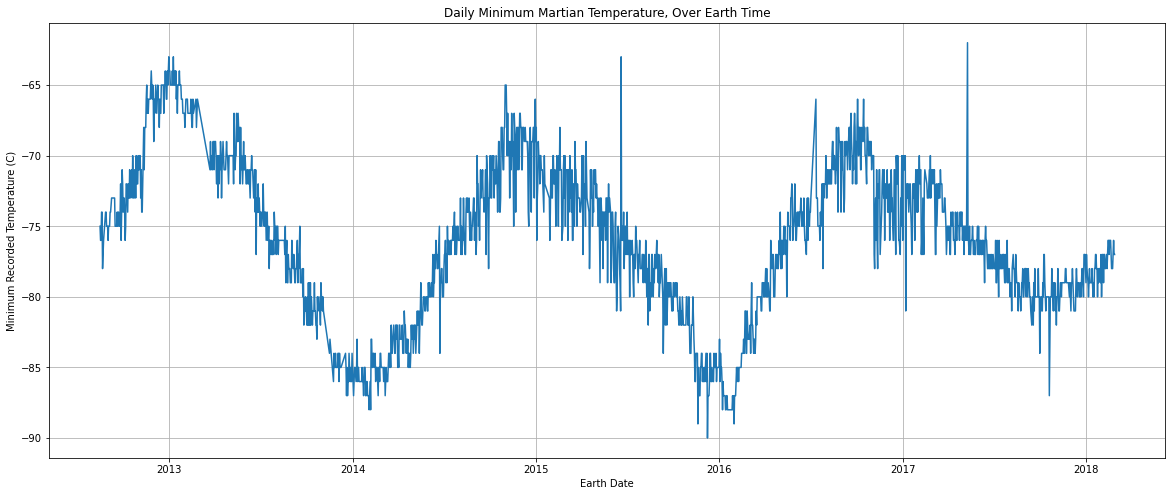

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.figure(figsize=(20,8))
plt.plot(temp_DF['terrestrial date'], temp_DF['min_temp'])
plt.grid(visible=True, which='both')
plt.title('Daily Minimum Martian Temperature, Over Earth Time')
plt.xlabel('Earth Date')
plt.ylabel('Minimum Recorded Temperature (C)')
plt.savefig("../Visuals/Daily_Mars_Temp.jpg")
plt.show()

The distance from peak to peak is roughly short of two Earth years, about 700 days or so, which gives a rough estimate of how long a Martian year is. A quick look at NASA's "In Depth" information page on Mars from their Solar System Exploration site shows that a Martian year is 687 Earth days or 669.6 sols (Martian days) long.

### 4) Save the data into .csv files and quit the browser session.

In [20]:
# Write the data to a CSV
temp_DF.to_csv("../Resources/mars_weather.csv")
monthly_avg_low.to_csv("../Resources/mars_monthly_low_temps.csv")
monthly_avg_baro.to_csv("../Resources/mars_monthly_atmosphere.csv")

In [21]:
browser.quit()

### References:

* “In Depth | Mars.” NASA, NASA, 8 July 2021, https://solarsystem.nasa.gov/planets/mars/in-depth/

* Wikipedia contributors. "Climate of Mars." Wikipedia, The Free Encyclopedia. Wikipedia, The Free Encyclopedia, 28 Feb. 2023. Web. 16 Mar. 2023.